# Week 10 - Information Theory

In [3]:
print("Hello World!")

Hello World!


In [4]:
import zlib # lzma

text = "Here's some text some text text with repetition"
print(f"Original text {len(text)} bytes: ", text)

text_bytes = text.encode("ascii")
comp = zlib.compress(text_bytes)
print(f"Compressed text {len(comp)} bytes: ", comp)

decomp = zlib.decompress(comp)
print("Decompressed text", decomp.decode('ascii'))

ratio = len(comp) / len(text_bytes)
print(f"Compression Ratio: {ratio:.2f}")

Original text 47 bytes:  Here's some text some text text with repetition
Compressed text 42 bytes:  b'x\x9c\xf3H-JU/V(\xce\xcfMU(I\xad(Ab\x81\x89\xf2\xcc\x92\x0c\x85\xa2\xd4\x82\xd4\x92\xcc\x92\xcc\xfc<\x00\x9b\xcd\x11\xb5'
Decompressed text Here's some text some text text with repetition
Compression Ratio: 0.89


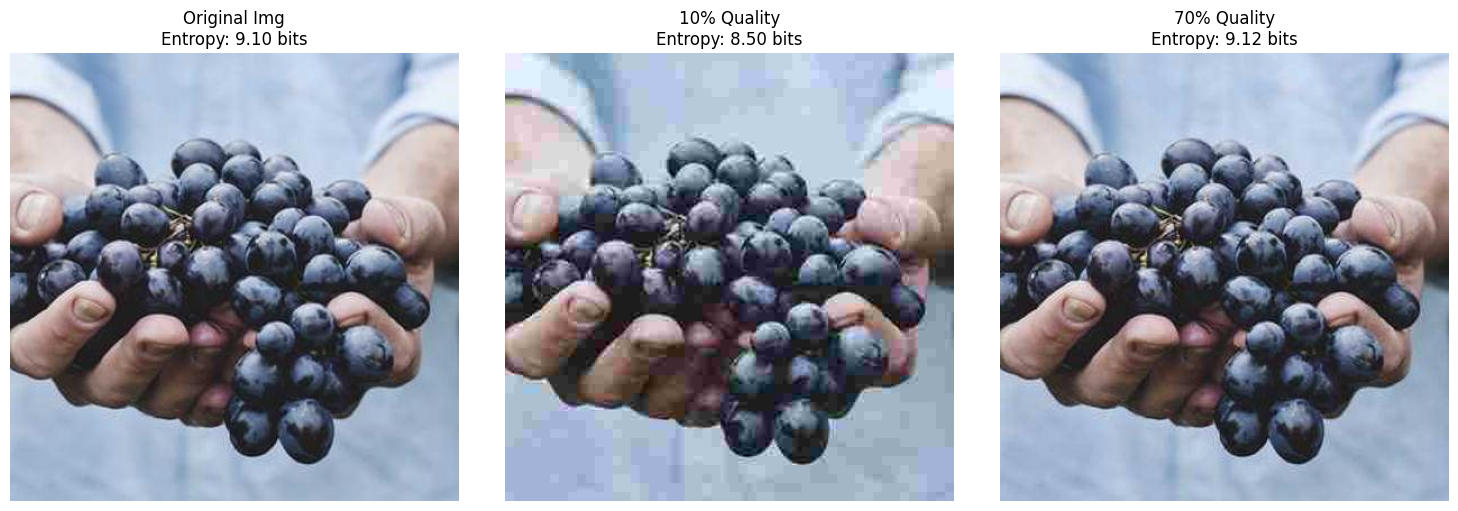

In [11]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def entropy(img):
    hist = img.histogram()
    probs = [float(h)/sum(hist) for h in hist]
    return -sum(p * np.log2(p) for p in probs if p != 0)

def compress(img, quality=75):
    fname = f'../images/q_{quality}.jpg'
    img.save(fname, 'JPEG', quality=quality)
    compressed = Image.open(fname)
    return compressed, entropy(compressed)

url = "https://picsum.photos/400/400"
response = requests.get(url)
original = Image.open(BytesIO(response.content))

qualities = [10, 70]
images    = [original]
entropies = [entropy(original)]
titles    = ['Original Img']

for q in qualities:
    img_c, img_h = compress(original, q)
    images.append(img_c)
    entropies.append(img_h)
    titles.append(f"{q}% Quality")

plt.figure(figsize=(15,5))
for lcv,(img, entropy, title) in enumerate(zip(images, entropies, titles), start=1):
    plt.subplot(1, len(images), lcv)
    plt.imshow(img)
    plt.title(f"{title}\nEntropy: {entropy:.2f} bits")
    plt.axis('off')

plt.tight_layout()
plt.show()



#Week 11- Network Simulation

In [1]:
%pip install faker tqdm -q
from queue import Queue
from faker import Faker
from time import time, sleep


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
